In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#2. Load dataset (e.g., SMS Spam Collection Dataset)

url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

In [3]:
#3. Encode labels: ham=0, spam=1

df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

In [4]:
#4. Text preprocessing & feature extraction

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label_num']

In [5]:
#5. Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#6. Train the model

model = MultinomialNB()
model.fit(X_train, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [9]:
#7. Predictions

y_pred = model.predict(X_test)

In [10]:
#8. Evaluation

print("🔍 Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.94      0.95      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115

✅ Accuracy Score: 0.9856502242152466


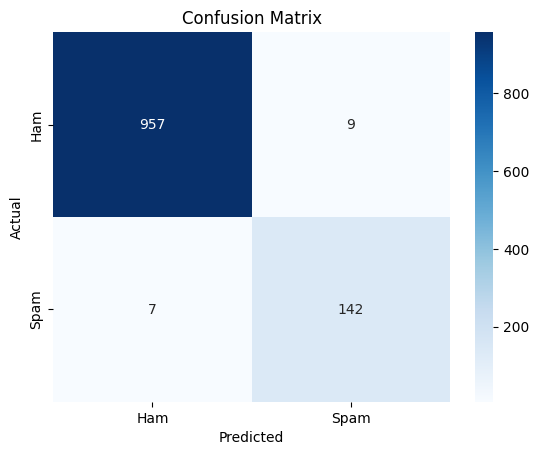

In [11]:
#9. Confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
#10. Predict sample input

sample = ["Congratulations! You’ve won a $1000 Walmart gift card. Go to http://bit.ly/12345"]
sample_transformed = vectorizer.transform(sample)
prediction = model.predict(sample_transformed)
print("📨 Sample Message Prediction:", "Spam" if prediction[0] == 1 else "Ham")


📨 Sample Message Prediction: Spam
